In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier

In [2]:

import seaborn as sns

In [3]:
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif

plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

In [4]:
df = pd.read_csv("~/Downloads/2021-2022 NBA Player Stats - Regular.csv",sep=";", encoding="Windows-1252")
df.head(10)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,22,TOR,73,28,23.6,3.6,8.3,...,0.595,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1
1,2,Steven Adams,C,28,MEM,76,75,26.3,2.8,5.1,...,0.543,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9
2,3,Bam Adebayo,C,24,MIA,56,56,32.6,7.3,13.0,...,0.753,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1
3,4,Santi Aldama,PF,21,MEM,32,0,11.3,1.7,4.1,...,0.625,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1
4,5,LaMarcus Aldridge,C,36,BRK,47,12,22.3,5.4,9.7,...,0.873,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9
5,6,Nickeil Alexander-Walker,SG,23,TOT,65,21,22.6,3.9,10.5,...,0.743,0.6,2.3,2.9,2.4,0.7,0.4,1.4,1.6,10.6
6,6,Nickeil Alexander-Walker,SG,23,NOP,50,19,26.3,4.7,12.6,...,0.722,0.7,2.6,3.3,2.8,0.8,0.4,1.7,1.8,12.8
7,6,Nickeil Alexander-Walker,SG,23,UTA,15,2,9.9,1.1,3.2,...,0.917,0.1,1.5,1.5,1.1,0.3,0.3,0.5,1.0,3.5
8,7,Grayson Allen,SG,26,MIL,66,61,27.3,3.9,8.6,...,0.865,0.5,2.9,3.4,1.5,0.7,0.3,0.7,1.5,11.1
9,8,Jarrett Allen,C,23,CLE,56,56,32.3,6.6,9.7,...,0.708,3.4,7.3,10.8,1.6,0.8,1.3,1.7,1.7,16.1


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812 entries, 0 to 811
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      812 non-null    int64  
 1   Player  812 non-null    object 
 2   Pos     812 non-null    object 
 3   Age     812 non-null    int64  
 4   Tm      812 non-null    object 
 5   G       812 non-null    int64  
 6   GS      812 non-null    int64  
 7   MP      812 non-null    float64
 8   FG      812 non-null    float64
 9   FGA     812 non-null    float64
 10  FG%     812 non-null    float64
 11  3P      812 non-null    float64
 12  3PA     812 non-null    float64
 13  3P%     812 non-null    float64
 14  2P      812 non-null    float64
 15  2PA     812 non-null    float64
 16  2P%     812 non-null    float64
 17  eFG%    812 non-null    float64
 18  FT      812 non-null    float64
 19  FTA     812 non-null    float64
 20  FT%     812 non-null    float64
 21  ORB     812 non-null    float64
 22  DR

In [6]:
df.describe()

,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,...,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000
mean,304.501232,26.051724,36.704433,16.672414,18.265394,2.869951,6.386576,0.426235,0.871305,2.560591,...,0.658267,0.812931,2.519828,3.331650,1.808251,0.582759,0.353571,0.978695,1.564655,7.812438
std,172.637333,4.059640,25.899099,23.817195,9.648292,2.223988,4.651121,0.148525,0.841935,2.205642,...,0.283491,0.744196,1.790656,2.352818,1.838080,0.425452,0.360811,0.817941,0.826783,6.138077
min,1.000000,19.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,158.750000,23.000000,12.000000,0.000000,10.500000,1.200000,3.000000,0.380750,0.200000,0.800000,...,0.600000,0.300000,1.300000,1.700000,0.500000,0.300000,0.100000,0.400000,1.000000,3.300000
50%,300.500000,25.000000,36.500000,4.000000,17.500000,2.400000,5.150000,0.439500,0.700000,2.050000,...,0.750000,0.600000,2.300000,2.900000,1.200000,0.500000,0.300000,0.800000,1.600000,6.300000
75%,459.000000,29.000000,61.000000,25.000000,25.725000,3.900000,8.725000,0.500000,1.400000,3.900000,...,0.838000,1.100000,3.400000,4.400000,2.400000,0.900000,0.500000,1.300000,2.200000,10.600000
max,605.000000,41.000000,82.000000,82.000000,43.500000,11.400000,21.800000,1.000000,4.500000,11.700000,...,1.000000,4.600000,11.000000,14.700000,10.800000,2.500000,2.800000,4.800000,5.000000,30.600000


/home/miki/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


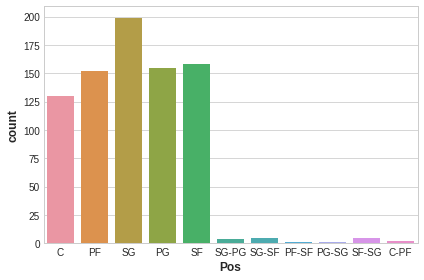

In [7]:
sns.countplot(df['Pos'],label="Count")
plt.show()

In [8]:
df['Pos']

0       C
1       C
2       C
3      PF
4       C
       ..
807    PF
808    PG
809     C
810     C
811     C
Name: Pos, Length: 812, dtype: object

In [9]:
X = df.drop(['Pos','Tm','Player'], axis=1)
y = df['Pos']

for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()


In [10]:
df.drop('Tm',axis=1)

,Rk,Player,Pos,Age,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,22,73,28,23.6,3.6,8.3,0.439,...,0.595,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1
1,2,Steven Adams,C,28,76,75,26.3,2.8,5.1,0.547,...,0.543,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9
2,3,Bam Adebayo,C,24,56,56,32.6,7.3,13.0,0.557,...,0.753,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1
3,4,Santi Aldama,PF,21,32,0,11.3,1.7,4.1,0.402,...,0.625,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1
4,5,LaMarcus Aldridge,C,36,47,12,22.3,5.4,9.7,0.550,...,0.873,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807,601,Thaddeus Young,PF,33,26,0,18.3,2.6,5.5,0.465,...,0.481,1.5,2.9,4.4,1.7,1.2,0.4,0.8,1.7,6.3
808,602,Trae Young,PG,23,76,76,34.9,9.4,20.3,0.460,...,0.904,0.7,3.1,3.7,9.7,0.9,0.1,4.0,1.7,28.4
809,603,Omer Yurtseven,C,23,56,12,12.6,2.3,4.4,0.526,...,0.623,1.5,3.7,5.3,0.9,0.3,0.4,0.7,1.5,5.3
810,604,Cody Zeller,C,29,27,0,13.1,1.9,3.3,0.567,...,0.776,1.9,2.8,4.6,0.8,0.3,0.2,0.7,2.1,5.2


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2) 

In [12]:
X_train.shape, y_train.shape

((649, 27), (649,))

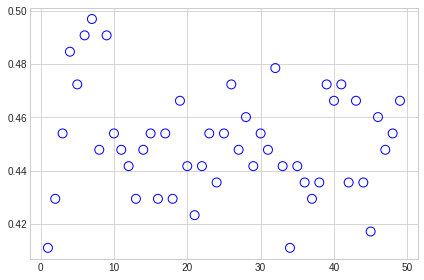

In [13]:
%matplotlib inline
fig = plt.figure()

for n in range(1,50):
    decision_tree_classifier = DecisionTreeClassifier(max_depth=n)
    decision_tree_classifier.fit(X_train, y_train)
    y=decision_tree_classifier.score(X_test,y_test)
    plt.scatter(n, y, s=80, facecolors='none', edgecolors='b')

plt.show(block = True)

In [20]:
# Osztályozó létrehozása
decision_tree_classifier = DecisionTreeClassifier(max_depth=1)

# Tanítás a tanító adatkészlettel
decision_tree_classifier.fit(X_train, y_train)
decision_tree_classifier.score(X_test,y_test)

0.4110429447852761

Model accuracy score with criterion entropy: 0.4110


[Text(334.8, 326.15999999999997, 'X[18] <= 0.95\ngini = 0.804\nsamples = 649\nvalue = [103, 1, 128, 1, 120, 134, 4, 152, 2, 4]'),
 Text(167.4, 108.72000000000003, 'gini = 0.761\nsamples = 439\nvalue = [25, 0, 50, 1, 113, 97, 4, 144, 2, 3]'),
 Text(502.20000000000005, 108.72000000000003, 'gini = 0.69\nsamples = 210\nvalue = [78, 1, 78, 0, 7, 37, 0, 8, 0, 1]')]

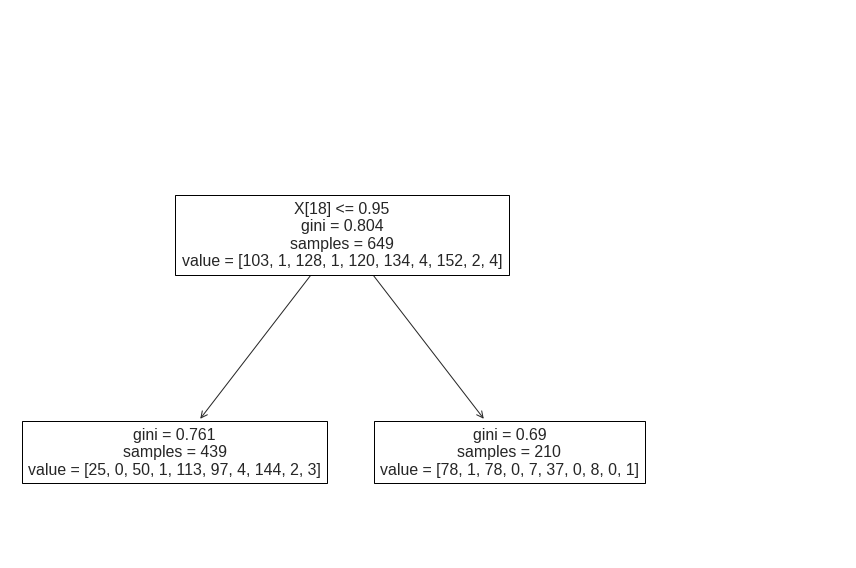

In [21]:
from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, decision_tree_classifier.predict(X_test))))
y_pred_train_en = decision_tree_classifier.predict(X_train)
y_pred_train_en
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(decision_tree_classifier.fit(X_train, y_train))

In [22]:
y_test[:10]

739    SG
456     C
370    SG
497     C
147    PF
210    SF
8      SG
386    SG
427     C
407    SF
Name: Pos, dtype: object

In [23]:
decision_tree_classifier.predict(X_test[:10])

array(['SG', 'C', 'SG', 'C', 'SG', 'SG', 'SG', 'SG', 'C', 'SG'],
      dtype=object)